In [10]:
from scipy.odr import RealData, ODR, quadratic
import numpy as np

In [2]:
data = RealData(x=[30, 40, 50], y=[34.1, 36.3, 30.0], sy=[0.5, 0.5, 0.5])

In [3]:
odr = ODR(data, quadratic)

In [4]:
odr.run()

In [5]:
odr.output.pprint()

Beta: [ -0.0425   3.195  -23.5   ]
Beta Std Error: [  3.81147882e-16   2.98043285e-14   5.74159958e-13]
Beta Covariance: [[  7.99289511e-05  -6.22006426e-03   1.17995987e-01]
 [ -6.22006426e-03   4.88737625e-01  -9.36378134e+00]
 [  1.17995987e-01  -9.36378134e+00   1.81377284e+02]]
Residual Variance: 1.8175355256292112e-27
Inverse Condition #: 1.8584864633638355e-05
Reason(s) for Halting:
  Parameter convergence


In [11]:
B = odr.output.beta; print(f'B = {B}')
S = np.diag(odr.output.cov_beta); print(f'S = {S}')

B = [ -0.0425   3.195  -23.5   ]
S = [  7.99289511e-05   4.88737625e-01   1.81377284e+02]


In [15]:
maxloc = -B[1]/(2*B[0]); maxloc

37.588235294117659

In [16]:
maxunc = np.sqrt(B[1]**2/(4*B[0]**4)*S[0]**2+(1/(4*B[0]**2))**2*S[1]**2); maxunc

5.7502889588434734

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

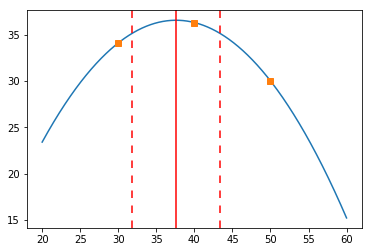

In [18]:
x = np.arange(20, 60, 0.01)
plt.plot(x, quadratic.fcn(B, x))
plt.plot(data.x, data.y, 's')
#plt.plot(x, quadratic.fcn(B - S, x))
#plt.plot(x, quadratic.fcn(B + S, x))
plt.axvline(maxloc, color='r')
plt.axvline(maxloc - maxunc, color='r', dashes=[5,5])
plt.axvline(maxloc + maxunc, color='r', dashes=[5,5])